# Classification

## Grid search

#### We will use Support Vector Machines (SVM)

code source: https://medium.com/@hammad.ai/using-grid-search-for-hyper-parameter-tuning-bad6756324cc

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# iris data set
iris = load_iris()

In [3]:
print(iris['DESCR'])
print(iris['filename'])
print(iris['feature_names'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# put the data into a data frame

# Extract the data
data_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# Extract the target
target_iris = pd.DataFrame(iris['target'], columns=['class'])
# Combine into one data set
df_iris = pd.concat([target_iris, data_iris], axis='columns')

df_iris.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [5]:
df_iris.dropna(inplace=True)

In [8]:
X = df_iris.drop('class',axis=1).values
y = df_iris['class'].values

In [11]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# define the grid

# SVM takes two parameters - C and kernel

# C - regularization parameter (cost parameter) - controls the trade off between maximising the margin 
# (distance between the decision boundary and the data points) and minimising the classification error 
# on the training data.

# kernel - type of kernel function to be used when transforming the input data into a higher dimensional space.
# poly - polynomial 
# rbf - radial basis function

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [13]:
# model training and evaluation

# SVC() - the model
# param_grid - the hyperparameter grid defined earlier
# cv - number of folds in cross validation
# scoring - strategy to evaluate the model
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [14]:
# get the best scores

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [15]:
best_params

{'C': 1, 'kernel': 'linear'}

In [16]:
best_score

0.9583333333333334

In [17]:
# final model training with the best parameter values

final_model = SVC(
  C = best_params['C'], 
  kernel = best_params['kernel'])

final_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [18]:
# visualise the grid

# grid search results
results = grid_search.cv_results_

# organise into a data frame
data = pd.DataFrame({
    'C': results['param_C'],
    'kernel': results['param_kernel'],
    'mean_score': results['mean_test_score']
})

In [19]:
# Reshape the data into a pivot table format for the heatmap
heatmap_data = data.pivot(index='C', columns='kernel', values='mean_score')

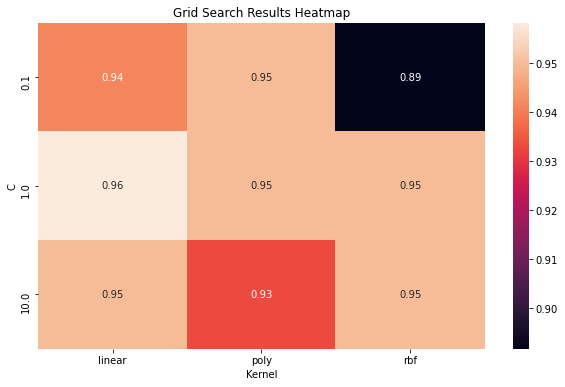

In [20]:
# Create grid search results heatmap
# The cells contain the accuracy score for each combination of parameters
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Results Heatmap')
plt.show()

## Random search

#### We will use Random Forest Classifier

code source: https://medium.com/@hammad.ai/tuning-model-hyperparameters-with-random-search-f4c1cc88f528

In [ ]:
# load features and target (X and y)
X, y = load_iris(return_X_y=True)

In [ ]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# define the hyperparameters space or distribution
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for best split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [22]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations - parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    verbose=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1  # number of jobs to run in parallel. n_jobs = -1 - use the maximum number of jobs that can be run on the current processor
)

In [23]:
# Fit the RandomizedSearchCV instance
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Evdokia Krasteva\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Evdokia Krasteva\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Evdokia Krasteva\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Evdokia Krasteva\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py"

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [24]:
# Retrieve the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
best_params

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [25]:
# Evaluate the model with best parameters on the test set
best_estimator = random_search.best_estimator_
test_accuracy = best_estimator.score(X_test, y_test)
test_accuracy

1.0

# Regression

In [26]:
# read the data
data = pd.read_csv('diamonds.csv')
data.head()

,carat,price
0,0.32,345
1,1.17,2774
2,1.01,2781
3,1.01,2788
4,0.96,2801


In [27]:
# independent variable
X = data['carat']
# dependent variable
y = data['price']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train = X_train.to_numpy()
X_train = X_train[:, np.newaxis]
X_train.shape

(592, 1)

In [30]:
X_test = X_test.to_numpy()
X_test = X_test[:, np.newaxis]
X_test.shape

(149, 1)

In [31]:
y_train = y_train.to_numpy()
y_train.shape

(592,)

In [32]:
y_test = y_test.to_numpy()
y_test.shape

(149,)

## Grid search

code source: https://medium.com/@hammad.ai/using-grid-search-for-hyper-parameter-tuning-bad6756324cc

In [33]:
# define model
model = Ridge()

In [34]:
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [38]:
# define hyperparameter space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]

In [39]:
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [40]:
# execute search
result = search.fit(X_train, y_train)

In [41]:
# best hyperparameters
result.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}

## Random search

code source: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

In [42]:
# define model
model = Ridge()

In [43]:
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [44]:
# define hyperparameter space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]

In [45]:
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [46]:
# execute search
result = search.fit(X_train, y_train)

In [47]:
# best hyperparameters
result.best_params_

{'alpha': 4.0024482044283785, 'fit_intercept': True, 'solver': 'sag'}